# Importing libraries and functions

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot as plt
import os
import sys



In [2]:
def make_dir(path): # Function to make adirectory to save files in
    cwd = os.getcwd()
    abs_path = cwd + path


    if not os.path.exists(abs_path):
        try: 
            os.makedirs(abs_path)
            print(abs_path)
        except OSError:return 0
        else: return 1
    else: return 2

In [3]:
def get_name(name): # Function to return the name of Optimizer as a string; used in function load_optimizers
    name = str(name).split()
    name = name[0].split(".")
    name = name[len(name)-1]
    return name

def load_optimizers(): # Function to load all optimizers
    Adadelta = tf.keras.optimizers.Adadelta(learning_rate=0.001,
                                            rho=0.95, epsilon=1e-07)
    RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    Adagrad = tf.keras.optimizers.Adagrad(learning_rate=0.01)
    SGD_NM = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
    SGD = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
    Adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    Nadam = tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

    opti_list = [RMSprop, Adadelta, Adagrad, SGD, SGD_NM, Adam, Nadam]
#     opti_list = [RMSprop, Adadelta]
    
    opti_name_list =[]
    for opti in opti_list:
        opti_name_list.append(get_name(opti))

    return opti_list, opti_name_list

In [4]:
# Declaring Variables
num_epochs = 200000
save_model_dir = 'SavedModels/MaxVal/OptiStudies/'
save_post_dir = 'PostProc/MaxVal/OptiStudies/'




In [5]:
# Reading data from .csv file
data_dat = pd.read_csv (r'data.csv')
pred_dat = pd.read_csv (r'test.csv')

In [6]:
# Extracting data into numpy arrays from pandas DataFrames

# Training data
X = pd.DataFrame(data_dat, columns = ['LD'])
X = X.to_numpy()

X_n = pd.DataFrame(data_dat, columns = ['XL'])
X_n = X_n.to_numpy()


y = pd.DataFrame(data_dat, columns = ['Ma'])
y = y.to_numpy()

# Prediction data
X_pred = pd.DataFrame(pred_dat, columns = ['LD'])
X_pred = X_pred.to_numpy()
X_pred_ns = X_pred

X_n_pred = pd.DataFrame(pred_dat, columns = ['XL'])
X_n_pred = X_n_pred.to_numpy()

y_pred = pd.DataFrame(pred_dat, columns = ['Ma'])
y_pred = y_pred.to_numpy()



In [7]:
# Returns normalised valeus of Mach Number and Maximum Mach Number per L/D ratio as two arrays

def get_norm_y(y,c): 
    num = int(y.shape[0] / c)
    max_val = np.zeros(num)
    y_norm = np.zeros([num*c])
    for i in range(num):
        max_val[i] = max(y[i*c:(i+1)*c])
        for j in range(c):
            y_norm[i*c + j] = y[i*c+j]/max_val[i]
    return y_norm, max_val
    
y_norm, max_y = get_norm_y(y, 201)
y_pred_norm, y_pred_max = get_norm_y(y_pred, 201)

# Returns Input set fro training the Max Mach Numbers

def get_x(x,c):
    num = int(x.shape[0]/c)
    x_n = np.zeros([num])
    
    for i in range(num):
        x_n[i] = x[i*c]
    
    return x_n

X_max = get_x(X,201)
X_pred_max = get_x(X_pred, 201)

X= np.hstack((X_n,X))
X_pred = np.hstack((X_n_pred,X_pred))

In [8]:
print(X_max)

[7. 9. 5.]


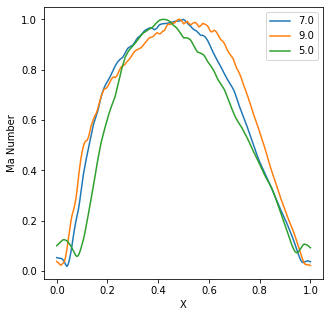

In [9]:
# Plot the values of normalised Mach Numbers of training set

fig2 = plt.figure()
for i in range(max_y.shape[0]):
    plt.plot(X_n[:201],y_norm[i*201:(i+1)*201], label=str(X_max[i]))

plt.xlabel("X")
plt.ylabel("Ma Number")
# plt.title('%s Loss Function for %s epochs \n Prediction vs Actual' %(loss_func_name, str(num_epochs)))
plt.legend(loc="upper right")
fig = plt.gcf()
fig.set_size_inches(5, 5)
# plt.savefig(save_dir + '%s_pred_%s.png' %(loss_func_name, str(num_epochs)), dpi=500)
plt.show()
plt.close(fig2)

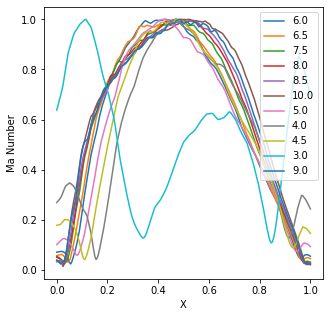

In [10]:
# Plot the values of normalised Mac Numbers of predict set

fig2 = plt.figure()
for i in range(X_pred_max.shape[0]):
    plt.plot(X_n_pred[:201],y_pred_norm[i*201:(i+1)*201], label=str(X_pred_max[i]))

plt.xlabel("X")
plt.ylabel("Ma Number")
# plt.title('%s Loss Function for %s epochs \n Prediction vs Actual' %(loss_func_name, str(num_epochs)))
plt.legend(loc="upper right")
fig = plt.gcf()
fig.set_size_inches(5, 5)
# plt.savefig(save_dir + '%s_pred_%s.png' %(loss_func_name, str(num_epochs)), dpi=500)
plt.show()
plt.close(fig2)

# Training for Maximum Mach Number per L/D ratio

DONOT RUN THIS IF YOU DONOT WANT TO RETRAIN THE MODEL

In [11]:
val_makedir = make_dir('/'+save_dir)

if val_makedir == 1:
    print('Directory has been created')
elif val_makedir == 2:
    print('Directory already exists')
else:
    print('Failed to create directory')
    sys.exit(0)

Directory already exists


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                4

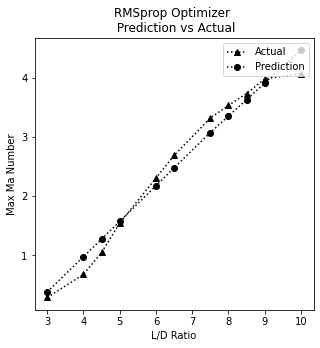

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_14 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_15 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_16 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 20)               

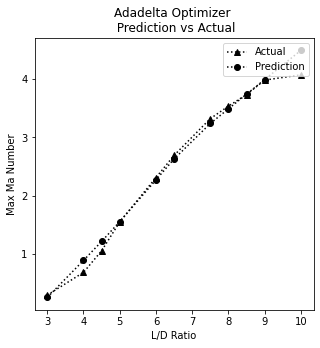

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_28 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_29 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_30 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_31 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_32 (Dense)             (None, 20)               

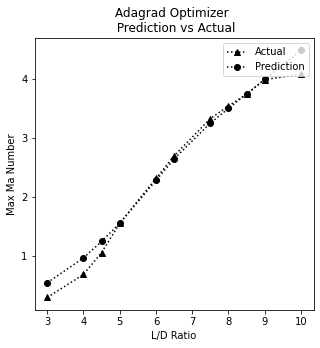

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_40 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_41 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_42 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_43 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_44 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_45 (Dense)             (None, 20)               

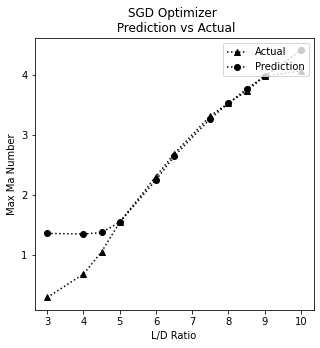

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_53 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_54 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_55 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_56 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_57 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_58 (Dense)             (None, 20)               

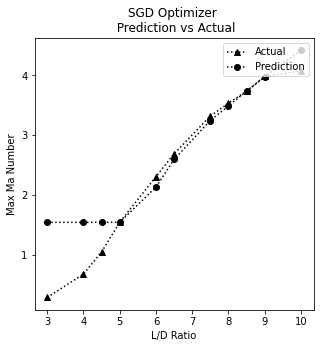

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_66 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_67 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_68 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_69 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_70 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_71 (Dense)             (None, 20)               

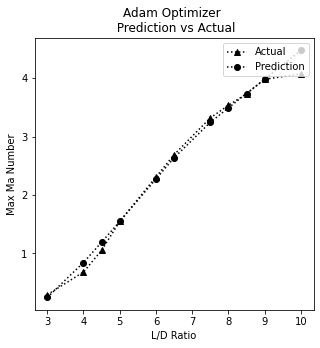

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 20)                40        
_________________________________________________________________
dense_79 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_80 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_81 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_82 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_83 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_84 (Dense)             (None, 20)               

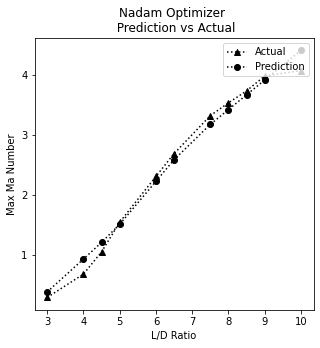

In [12]:
opti_list, opti_name_list = load_optimizers()
MAPE=np.zeros([len(opti_list), X_pred_max.shape[0]])
for i in range(len(opti_list)):
    opti = opti_list[i]
    opti_name = opti_name_list[i]
    
    # Filepaths for saving Model Checkpoints:
    save_model_path = save_model_dir+'model_'+opti_name
    
    early_stopping_callback_max = EarlyStopping(monitor='loss', 
                                        patience=500,
                                        min_delta= 1e-5,
                                        restore_best_weights=True,
                                        mode='auto')
    checkpoint_callback_max = ModelCheckpoint(filepath=save_model_path,
                                          monitor='loss',
                                          verbose=1,
                                          save_weights_only=False,
                                          save_best_only=True,
                                          mode='auto')
    
    # Setting up the model
    model = Sequential([
        Dense(20, activation = 'relu', input_shape=[1,]),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(1, activation = 'linear')
    ])

    print(model.summary())
    
    # Compiling the model
    model.compile(loss='mse', optimizer=opti, metrics=['mape'])
    
    # Training the net on training data
    history = model.fit(X_max,
                        max_y,
                        batch_size=3,
                        epochs=num_epochs,
                        verbose=0,
                        validation_split=0,
                        callbacks=[early_stopping_callback_max])
    model.save(save_model_path)
    
    pred_max = model.predict(X_pred_max)

    
    
    def sort_ascend(X,Y):
        x_ord=[]
        y_ord=[]
        for x, y in zip(X,Y):
            if len(x_ord)==0:
                x_ord.append(x)
                y_ord.append(y)
            elif x>=max(x_ord): 
                x_ord.insert(len(x_ord),x)
                y_ord.insert(len(y_ord),y)
            elif x<=min(x_ord): 
                x_ord.insert(0,x)
                y_ord.insert(0,y)
            else: 
                max_ind = 0
                for j in range(len(x_ord)):
                    if x<=x_ord[j]:
                        max_ind=j
                        break
                x_ord.insert(max_ind,x)
                y_ord.insert(max_ind,y)
        
        x_ord = np.asarray(x_ord)
        y_ord = np.asarray(y_ord)
        return x_ord, y_ord

    Xpm_sort, Ypm_sort = sort_ascend(X_pred_max, y_pred_max)
    Xpm_sort, pred_sort = sort_ascend(X_pred_max, pred_max)

    MAPE[i,:] = abs(pred_sort.flatten()-Ypm_sort)/Ypm_sort*100
    
    fig2 = plt.figure()
    plt.plot(Xpm_sort, Ypm_sort, '^k:', label='Actual')
    plt.plot(Xpm_sort, pred_sort, 'ok:', label='Prediction')
    plt.xlabel("L/D Ratio")
    plt.ylabel("Max Ma Number")
    plt.title('%s Optimizer \n Prediction vs Actual' %(opti_name))
    plt.legend(loc="upper right")
    fig = plt.gcf()
    fig.set_size_inches(5, 5)
    plt.savefig(save_post_dir + '%s_optimizer.png' %(opti_name), dpi=500)
    plt.show()
    plt.close(fig2)

    del(model)

In [13]:
temp = np.zeros([MAPE.shape[0],1])
for i in range(MAPE.shape[0]):
    temp[i,0] = np.mean(MAPE[i,:])
MAPE_n = np.hstack((MAPE,temp))
print(MAPE_n)
    


column_df = []
for i in range(len(Xpm_sort)):
    column_df.append(str(Xpm_sort[i]))
column_df.append("Mean")


MAPE_df = pd.DataFrame(MAPE_n, 
                       index=opti_name_list, 
                       columns=column_df)

MAPE_df.to_csv(save_post_dir + 'Cumilative_MAPE.csv', index=True, header=True, sep=',')

[[3.25437699e+01 4.40214014e+01 2.14989942e+01 1.86789637e+00
  5.64209861e+00 7.81160094e+00 7.35587737e+00 5.11418159e+00
  2.75248073e+00 1.82149119e+00 9.63558435e+00 1.27332161e+01]
 [1.38260808e+01 3.02234069e+01 1.52315227e+01 4.23917460e-01
  1.67857476e+00 2.30073414e+00 2.51601130e+00 1.31067525e+00
  1.44222945e-01 2.35573853e-01 1.03260848e+01 7.11061863e+00]
 [8.60370085e+01 4.11072138e+01 1.80910285e+01 4.55757428e-02
  1.49902306e+00 1.96916239e+00 2.25622909e+00 1.21347454e+00
  9.72537885e-02 6.11174374e-02 9.94160704e+00 1.47562449e+01]
 [3.68492319e+02 9.82248840e+01 3.07486200e+01 4.55371940e-02
  2.56004415e+00 1.63081844e+00 1.39133888e+00 1.05138272e-01
  9.07902619e-01 4.34263356e-02 8.39137932e+00 4.65946735e+01]
 [4.32538377e+02 1.27118914e+02 4.69799501e+01 8.59312609e-03
  7.58313268e+00 3.50951819e+00 2.28175719e+00 1.28305873e+00
  1.17557637e-02 9.80905054e-02 8.47653132e+00 5.72626981e+01]
 [1.57822415e+01 2.39220218e+01 1.32364196e+01 4.37716558e-02
  1

In [14]:
MAPE_df.head()

,3.0,4.0,4.5,5.0,6.0,6.5,7.5,8.0,8.5,9.0,10.0,Mean
RMSprop,32.543770,44.021401,21.498994,1.867896,5.642099,7.811601,7.355877,5.114182,2.752481,1.821491,9.635584,12.733216
Adadelta,13.826081,30.223407,15.231523,0.423917,1.678575,2.300734,2.516011,1.310675,0.144223,0.235574,10.326085,7.110619
Adagrad,86.037009,41.107214,18.091028,0.045576,1.499023,1.969162,2.256229,1.213475,0.097254,0.061117,9.941607,14.756245
SGD,368.492319,98.224884,30.748620,0.045537,2.560044,1.630818,1.391339,0.105138,0.907903,0.043426,8.391379,46.594673
SGD,432.538377,127.118914,46.979950,0.008593,7.583133,3.509518,2.281757,1.283059,0.011756,0.098091,8.476531,57.262698
